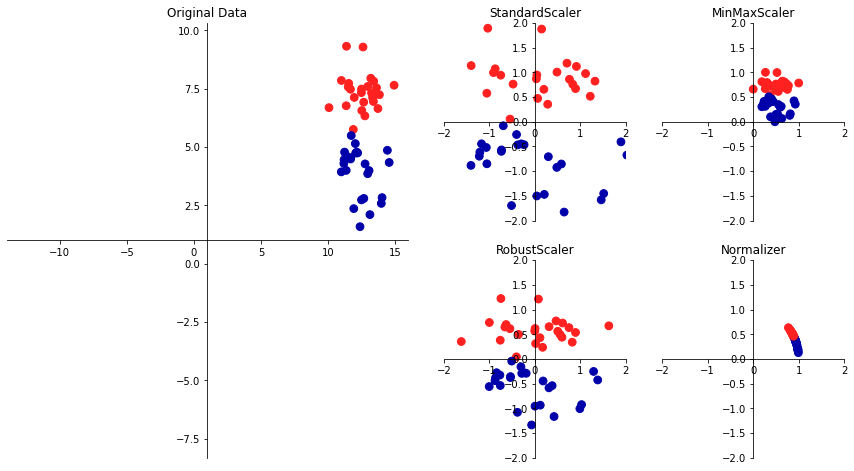

(426, 30)
(143, 30)
форма преобразованного массива: (426, 30)
min значение признака до масштабирования:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
max значение признака до масштабирования:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
min значение признака после масштабирования:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
max значение признака после масштабирования:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

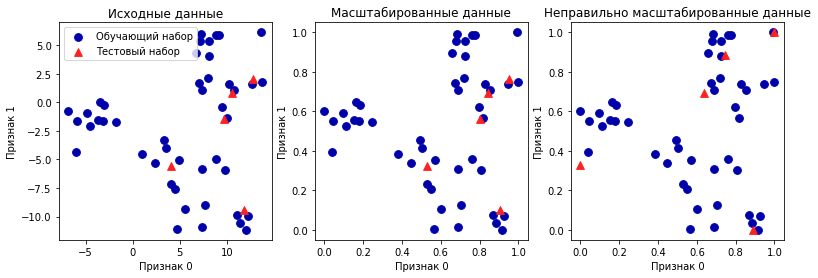

Правильность на тестовом наборе: 0.94
Правильность на масштабированном тестовом наборе: 0.97
Правильность SVM на тестовом наборе: 0.96


In [3]:
import mglearn
import sklearn
import matplotlib.pyplot as plt

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

"In[2]:"
mglearn.plots.plot_scaling()
plt.show()

"In[3]:"
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

"In[4]:"
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

"In[5]:"
scaler.fit(X_train)

"In[6]:"
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print("форма преобразованного массива: {}".format(X_train_scaled.shape))
print("min значение признака до масштабирования:\n {}".format(X_train.min(axis=0)))
print("max значение признака до масштабирования:\n {}".format(X_train.max(axis=0)))
print("min значение признака после масштабирования:\n {}".format( X_train_scaled.min(axis=0)))
print("max значение признака после масштабирования:\n {}".format( X_train_scaled.max(axis=0)))

"In[7]:"
X_test_scaled = (X_test - min_on_training) / range_on_training
print("min значение признака после масштабирования:\n{}".format(X_test_scaled.min(axis=0)))
print("max значение признака после масштабирования:\n{}".format(X_test_scaled.max(axis=0)))

"In[8]:"
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
 c=mglearn.cm2(0), label="Обучающий набор", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
 c=mglearn.cm2(1), label="Тестовый набор", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Исходные данные")

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c=mglearn.cm2(0), label="Обучающий набор", s=60)

axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label="Тестовый набор", s=60)
axes[1].set_title("Масштабированные данные")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="Обучающий набор", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label="Тестовый набор", s=60)
axes[2].set_title("Неправильно масштабированные данные")
for ax in axes:
 ax.set_xlabel("Признак 0")
 ax.set_ylabel("Признак 1")
plt.show()

"In[9]:"
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
X_scaled_d = scaler.fit_transform(X)

"In[10]:"
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(svm.score(X_test, y_test)))

"In[11]:"
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("Правильность на масштабированном тестовом наборе: {:.2f}".format( svm.score(X_test_scaled, y_test)))

"In[12]:"
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("Правильность SVM на тестовом наборе: {:.2f}".format(svm.score(X_test_scaled, y_test)))